## Week 2 Practice



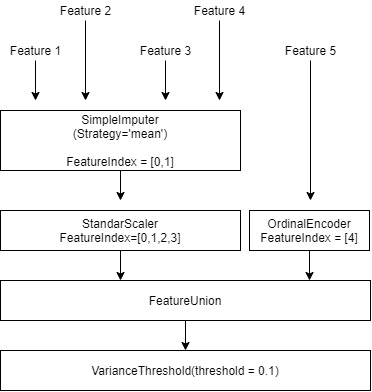

Data Preprocessing
V1: Recency - months since last donation
V2: Frequency - total number of donation
V3: Monetary - total blood donated in c.c.
V4: Time - months since first donation
V5: Wheather donor is had fever anytime in last month
The target attribute is a binary variable representing whether he/she donated blood in March 2021 ('Yes' stands for donating blood; 'No' stands for not donating blood).

Download dataset from following: https://drive.google.com/file/d/1lvvHj0v9LKwe6XUezgpIUY_c0HdJUcCb/view?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import os
import requests

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import set_config

1. Explore the dataset.
Download data file in CSV format from URL, upload it to runtime and then read it from local virtual disk.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving DataPreprocessingGraded_dataset (7).csv to DataPreprocessingGraded_dataset (7).csv


In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['DataPreprocessingGraded_dataset (7).csv']))

In [4]:
X = data[data.columns[:5]]
y = data.Target

Instructions
For all the questions below (practice and graded), use dataset from following link: 'https://drive.google.com/file/d/1lvvHj0v9LKwe6XUezgpIUY_c0HdJUcCb/view?usp=sharing'

Que 1:
How many samples are there in this dataset?

A) 783

B) 748

C) 782

D) 781

Answer: B

In [5]:
X.shape[0]

748

Que 2:
How many input features are there in this dataset?

A) 3

B) 4

C) 5

D) 2

Answer: C

In [6]:
X.shape[1]

5

Que 3:
What type of problem is this?

[Hint: look at the target variable.]

A) Regression

B) Classification

C) Clustering

D) Association rule finding

Correct: B

In [7]:
y.unique()

array(['YES', 'NO'], dtype=object)

Solution

Since the target variable is binary, it is a classification problem.

Que. 4
Which of the features has least variance?

[Hint: Ignore/remove missing values if any. Are there any categorical features?]

A) V1

B) V5

C) V3

D) V4

E) V2

Correct: B

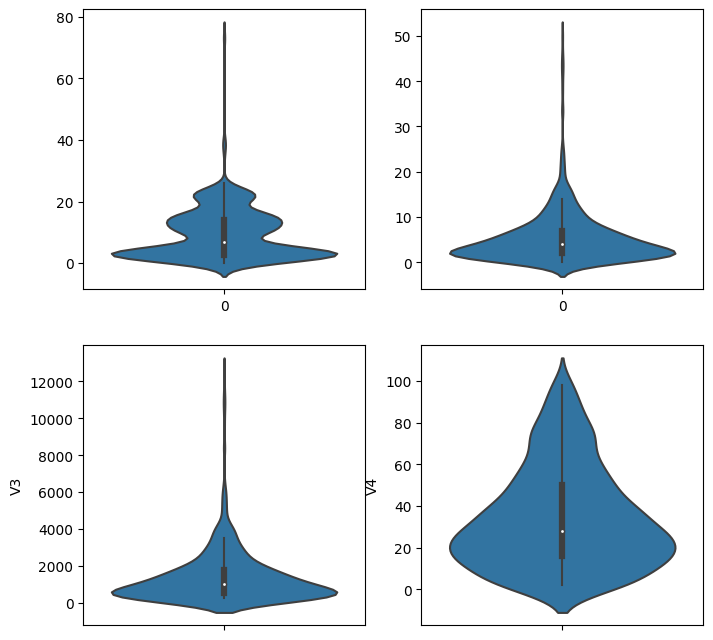

In [8]:
plt.figure(figsize=(8,8))
plt.subplot(221)
v1 = X.V1.replace('?',0)
# v1 = v1.replace('?', 0)
sns.violinplot(data=v1)
# sns.violinplot(v1)

plt.subplot(222)
v2 = X.V2.replace('?', 0)
sns.violinplot(data = v2)
plt.subplot(223)
sns.violinplot(data=X, y='V3')
plt.subplot(224)
sns.violinplot(data=X, y='V4')
plt.show()


In [9]:
X['V5'].unique()

array(['NEGATIVE'], dtype=object)

Que.5
Which of the following features has least number of outliers?

[Hint: Which visualization marks outliers? Ignore/remove missing values if any]

A) V1

B) V2

C) V3

Correct: A

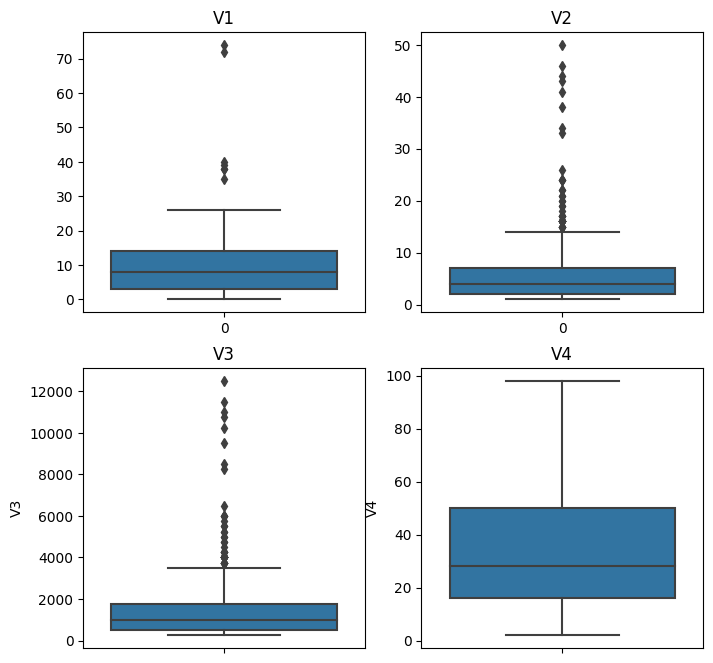

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(221)
ax.title.set_text('V1')
v1 = X.V1.replace('?', np.NaN)
v1 = v1.dropna()
sns.boxplot(data=v1)


ax = fig.add_subplot(222)
ax.title.set_text('V2')
v2 = X.V2.replace('?', np.NaN)
v2 = v2.dropna()
sns.boxplot(data=v2)


ax = fig.add_subplot(223)
ax.title.set_text('V3')
sns.boxplot(data=X, y='V3')

ax = fig.add_subplot(224)
ax.title.set_text('V4')
sns.boxplot(data=X, y='V4')
plt.show()


Que 6
Which of the following is true about target variable?

A) It has higher 'YES' entries than 'NO' entries.

B) It has higher 'NO' entries than 'YES' entries.

A) It has same number of entries of 'YES' and 'NO'

Correct: B

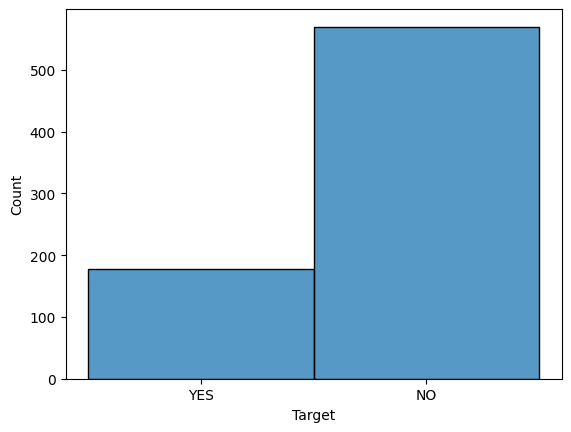

In [11]:
plt.figure()
sns.histplot(y)
plt.show()

Que. 7
How many features have missing values in the dataset?

[Hint: missing values are marked by '?']

A) 1

B) 2

C) 3

D) 4

Answer: B

In [12]:
tt = X.replace('?', np.NaN)
tt.isnull().sum()

V1    5
V2    5
V3    0
V4    0
V5    0
dtype: int64

Que. 8
What is total number of missing values in the dataset?

A) 12

B) 13

C) 10

D) 11

Answer: C

In [13]:
tt = X.replace('?', np.NaN)
tt.isnull().sum().sum()

10

Que. 9
What is average of first feature (i.e. 'V1') after applyting SimpleImputer(strategy = 'median')?

A) 9.552

B) 9.572

C) 9.592

D) 9.752

E) 9.567

F) None of these

Ans: A

In [14]:
ct = ColumnTransformer(transformers=[('scale', SimpleImputer(strategy='median'), [0])])
X.V1 = X.V1.replace('?', np.NaN)
ct.fit_transform(X).mean()

<ipython-input-14-ce8b90717b53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.V1 = X.V1.replace('?', np.NaN)


9.552139037433156

Que. 10
What is average of first column after applyting KNNImputer(n_neighbors = 3)?

A) 9.562

B) 9.572

C) 9.592

D) 9.752

E) 9.567

F) None of these

Ans: A

In [15]:
ct = ColumnTransformer(transformers=[('impute', KNNImputer(n_neighbors=3), [0])])
ct.fit_transform(X).mean()

9.562584118438762

Que. 11
What is average of second feature (i.e. 'V2') after applyting SimpleImputer(strategy = 'mean')?

A) 5.469

B) 5.564

C) 5.464

D) 5.764

E) 5.456

F) None of these

Ans: C

In [18]:
ct = ColumnTransformer(transformers=[('scale', SimpleImputer(strategy='mean'), [1])])
X.V2 = X.V2.replace('?', np.NaN)
ct.fit_transform(X).mean()

<ipython-input-18-7630f6eaabb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.V2 = X.V2.replace('?', np.NaN)


5.464333781965007

## Week 2 Graded

Que. 1
How many features remain after applying following pipeline to the feature matrix?


A) 5

B) 2

C) 3

D) 4

Ans: D

In [21]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold = 0.1)

numerical_pipe = ColumnTransformer(transformers=[('impute', SimpleImputer(strategy='mean'), [0,1,2,3])])
scale_pipe = Pipeline(steps=[('numeric', numerical_pipe),
                             ('scale', StandardScaler())])

categorical_pipe = ColumnTransformer(transformers= [('cat', OrdinalEncoder(), [4])])
complete_pipe = FeatureUnion([('numeric', scale_pipe), ('cat', categorical_pipe)])
pipe = Pipeline(steps= [('cp', complete_pipe),
                        ('varianceThreshold', VarianceThreshold(threshold = 0.1))])

pipe.fit_transform(X).shape


(748, 4)

In [22]:
data = pd.read_csv('/content/DataPreprocessingGraded_dataset (7).csv', na_values="?")

In [23]:
y = pd.DataFrame(data.pop('Target'))

num_pipe = Pipeline([('colselect', ColumnTransformer([('select', 'passthrough',[0,1,2,3])])), ('impute', SimpleImputer()), ('scale', StandardScaler())])
cat_pipe = ColumnTransformer([('encode', OrdinalEncoder(), [4])])
pipe = FeatureUnion([('numerical', num_pipe), ('categorical', cat_pipe)])
tr_x = pipe.fit_transform(data)

estimator = LogisticRegression()
oe = OrdinalEncoder()
tr_y = oe.fit_transform(y)
rfe = RFE(estimator, n_features_to_select=2)

rfe.fit_transform(tr_x, tr_y.reshape(-1,))
rfe.support_

array([ True, False,  True, False, False])

In [24]:
set_config(display='diagram')

Que. 2
What are the two most important features computed by RFE?

Preprocess the data using pipeline shown in the diagram. Use LogisticRegression (with default parameters) for the estimator. Encode target variable via ordinal encoding.

A)V1

B)V2

C)V3

D)V4

Correct: A and C

In [25]:
%%capture

# use logistic regressor with default option for estimator
estimator = LogisticRegression()

# encode target via ordinal encoding
# reshaping y is necessary because the transformer only accepts column vector
y_encoded = OrdinalEncoder().fit_transform(y.to_numpy().reshape(-1,1)).reshape(-1,1)

# create RFE object with necessary parameters
selector = RFE(estimator, n_features_to_select=2)

# run RFE on dataset
selector = selector.fit(complete_pipe.fit_transform(X), y_encoded)

In [26]:
# find the finally selected features
# selected features have 'True' in corresponding indices
print(selector.support_)

[ True False  True False False]


Que. 3
What are the indices of two most important features computed by SFS (forward)?

Preprocess the data using pipeline shown in the diagram. Use LogisticRegression (with default parameters) for the estimator. Encode target variable via ordinal encoding.

A) 0 (i.e. feature V1)

B) 1 (i.e. feature V2)

C) 2 (i.e. feature V3)

D) 3 (i.e. feature V4)

Correct: B and D

In [27]:
%%capture
selector = SequentialFeatureSelector(estimator=LogisticRegression(),
                                     n_features_to_select=2)

# run SFS in backward direction
selector.fit(complete_pipe.fit_transform(X), y_encoded)



In [28]:
# find the finally selected features
# selected features have 'True' in corresponding indices

selector.support_

array([False,  True, False,  True, False])

Que. 4
What are the indices of two most important features computed by SFS (backward)?

Preprocess the data using pipeline shown in the diagram. Use LogisticRegression (with default parameters) for the estimator. Encode target variable via ordinal encoding.

A) 0 (i.e. feature V1)

B) 1 (i.e. feature V2)

C) 2 (i.e. feature V3)

D) 3 (i.e. feature V4)

Correct: C and D

In [29]:
%%capture

# initialize SFS object with appropriate parameters
selector = SequentialFeatureSelector(estimator= LogisticRegression(),
                                     n_features_to_select =2,
                                     direction= 'backward')

# run SFS in backward direction
selector.fit(complete_pipe.fit_transform(X), y_encoded)



In [30]:
# find the finally selected features
# selected features have 'True' in corresponding indices

selector.support_

array([False, False,  True,  True, False])